In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sklearn.neighbors._base 
import sys
sys.modules['sklearn.neighbors.base'] = sklearn.neighbors._base

from missingpy import MissForest
from sklearn.impute import KNNImputer

In [26]:
df = pd.read_stata('../data/IBNET3a4py.dta')
df.head(14).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
Year,2004.000000,2.005000e+03,2.006000e+03,2.007000e+03,2.008000e+03,2.009000e+03,2.010000e+03,2.011000e+03,2.012000e+03,2.013000e+03,2.014000e+03,2.015000e+03,2016.000000,2017.00000
s1,NaN,NaN,2.754570e+08,NaN,2.773810e+08,2.773810e+08,3.015390e+08,3.015390e+08,3.015390e+08,2.773810e+08,3.015390e+08,3.785400e+07,NaN,NaN
t2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
t3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
t4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
s3,NaN,2.000000e+04,1.300000e+04,6.000000e+03,5.800000e+03,5.800000e+03,6.000000e+03,6.000000e+03,5.000000e+03,5.460000e+03,5.359000e+03,5.273667e+03,NaN,NaN
s4,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.00000
s5,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.00000
s6,NaN,1.980000e+04,2.000000e+03,3.000000e+03,2.900000e+03,2.870000e+03,2.880000e+03,2.880000e+03,2.890000e+03,2.900000e+03,2.898000e+03,2.737417e+03,NaN,NaN
s8,NaN,2.030000e+01,2.030000e+01,5.250000e+01,2.840000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.030000e+01,2.030000e+01,2.030000e+01,NaN,NaN


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26384 entries, 0 to 26383
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Year       26384 non-null  int16  
 1   s1         6891 non-null   float64
 2   t2         8607 non-null   float64
 3   t3         7502 non-null   float64
 4   t4         6873 non-null   float64
 5   s3         15368 non-null  float64
 6   s4         26214 non-null  float64
 7   s5         12335 non-null  float64
 8   s6         15371 non-null  float64
 9   s8         14696 non-null  float64
 10  y1         15365 non-null  float64
 11  y2         15049 non-null  float64
 12  y3         13652 non-null  float64
 13  t5         6457 non-null   float64
 14  t1         6457 non-null   float64
 15  ID         26384 non-null  int16  
 16  s6_decile  26384 non-null  int8   
 17  ID1        26384 non-null  float32
 18  dc7        15284 non-null  float32
 19  dc8        12313 non-null  float32
 20  dc9   

C:\Users\doris\AppData\Local\Temp\ipykernel_23084\3131789932.py:6: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  g = sns.displot(


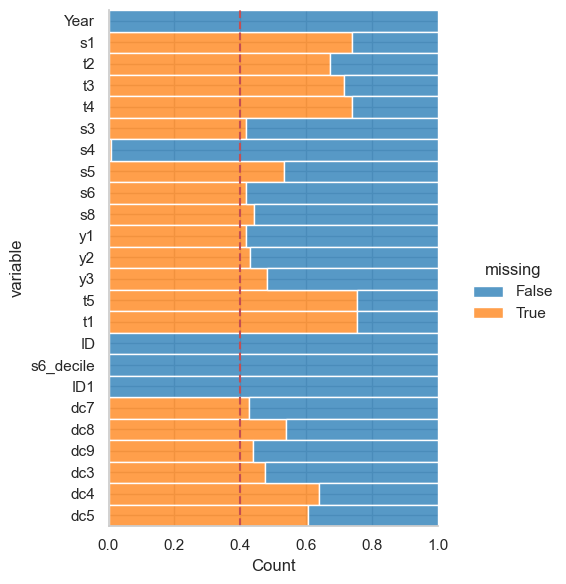

In [4]:
import seaborn as sns

palette = sns.color_palette("tab10")
sns.set(style="whitegrid") 

g = sns.displot(
    data=df.isnull().melt(value_name='missing'),
    y='variable',
    hue='missing',
    multiple='fill',
    palette=palette,
    height=6,
    aspect=0.8
)

# Add a vertical line at 0.4 threshold
plt.axvline(0.4, color='r', ls='--')

# Improve layout and show the plot
#plt.tight_layout()
plt.show()

In [5]:
# missing forest
import warnings
import logging
logging.getLogger().setLevel(logging.WARNING)
warnings.filterwarnings('ignore', message="No missing value located; returning original dataset.")
warnings.filterwarnings('ignore', category=FutureWarning)

for idx in df["ID1"].unique():
    subset = df[df["ID1"] == idx]  # Get the subset of the dataframe
    
    # Identify columns with all missing values
    cols_fully_missing = subset.columns[subset.isnull().all()]
    
    # Continue only if there's at least one column with some data
    if not subset.drop(columns=cols_fully_missing).empty:  
        imputer = MissForest(max_iter=5, n_jobs=-1)
        # Impute only on columns that are not fully missing
        x_imp = imputer.fit_transform(subset.drop(columns=cols_fully_missing))
        
        # Update the dataframe with imputed values
        df.loc[df["ID1"] == idx, subset.columns.difference(cols_fully_missing)] = x_imp
        print(f"complete imputation for ID1 = {idx}.")
    else:
        print(f"No usable data for ID1 = {idx}. Skipping...")


Iteration: 0
Iteration: 1
Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 0
Iteration: 1
Iteration: 0
Iteration: 1
Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 0
Iteration: 1
Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 0
Iteration: 1
Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 0
Iteration: 1
Iteration: 2

KeyboardInterrupt: 

C:\Users\doris\AppData\Local\Temp\ipykernel_8508\800155416.py:1: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  g = sns.displot(


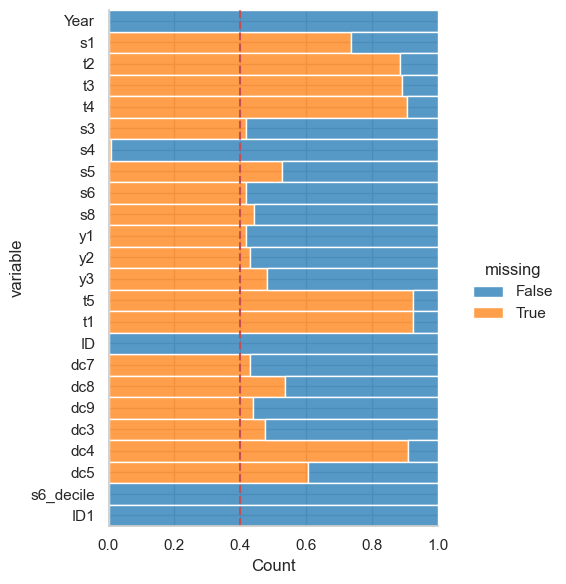

In [10]:
g = sns.displot(
    data=df.isnull().melt(value_name='missing'),
    y='variable',
    hue='missing',
    multiple='fill',
    palette=palette,
    height=6,
    aspect=0.8
)

# Add a vertical line at 0.4 threshold
plt.axvline(0.4, color='r', ls='--')

# Improve layout and show the plot
#plt.tight_layout()
plt.show()

In [7]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)

for idx in df["ID1"].unique():
    # Subsetting the dataframe for the current decile
    idx_rows = df[df["ID1"] == idx].index
    
    # Ensure the subset is not empty
    if not idx_rows.empty:
        # Impute using only the rows from the current decile
        knn_imp = imputer.fit_transform(df.loc[idx_rows, :])
        
        # Ensure the output shape matches and update the dataframe
        if len(idx_rows) == knn_imp.shape[0]:
            df.loc[idx_rows, :] = knn_imp
        else:
            print(f"Shape mismatch error for s6_decile = {idx}")
    else:
        print(f"No data for s6_decile = {idx}. Skipping...")


C:\Users\doris\AppData\Local\Temp\ipykernel_23084\800155416.py:1: UserWarning: The palette list has more values (10) than needed (1), which may not be intended.
  g = sns.displot(


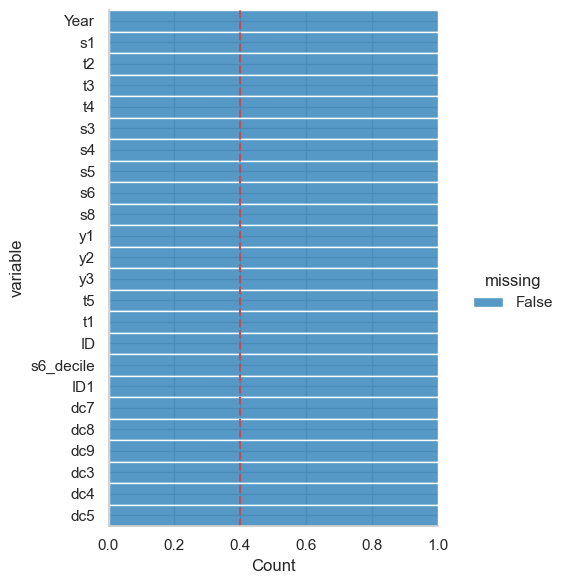

In [28]:
g = sns.displot(
    data=df.isnull().melt(value_name='missing'),
    y='variable',
    hue='missing',
    multiple='fill',
    palette=palette,
    height=6,
    aspect=0.8
)

# Add a vertical line at 0.4 threshold
plt.axvline(0.4, color='r', ls='--')

# Improve layout and show the plot
#plt.tight_layout()
plt.show()

In [27]:
from fancyimpute import IterativeImputer
import numpy as np

# Initialize MICE imputer
mice_imputer = IterativeImputer(
    missing_values=np.nan, 
    sample_posterior=False, 
    max_iter=100, 
    tol=0.001, 
    random_state=0,
    n_nearest_features=30, 
    initial_strategy='mean'
)

for idx in df["ID1"].unique():
    print(f"Starting imputation for ID1 = {idx}.")
    # Get the subset of the DataFrame for the current index value
    subset = df[df["ID1"] == idx]
    
    # Ensure the subset does not contain only NaNs and has numeric data
    if not subset.empty and not subset.isnull().all().all() and subset.select_dtypes(include=np.number).shape[1] > 0:
        # Select only numeric columns for imputation
        numeric_subset = subset.select_dtypes(include=np.number)
        
        # Perform MICE imputation on the numeric subset
        try:
            mice_imp = mice_imputer.fit_transform(numeric_subset)
            
            # Assign the imputed data back to the DataFrame
            df.loc[df["ID1"] == idx, numeric_subset.columns] = mice_imp
            print(f"Completed imputation for ID1 = {idx}.")
            
        except ValueError as e:
            print(f"ValueError for ID1 = {idx}: {e}")
    else:
        print(f"No data found or non-numeric data present for ID1 = {idx}")


Starting imputation for ID1 = 20041.0.
Completed imputation for ID1 = 20041.0.
Starting imputation for ID1 = 20051.0.
Completed imputation for ID1 = 20051.0.
Starting imputation for ID1 = 20061.0.
Completed imputation for ID1 = 20061.0.
Starting imputation for ID1 = 20071.0.
Completed imputation for ID1 = 20071.0.
Starting imputation for ID1 = 20081.0.
Completed imputation for ID1 = 20081.0.
Starting imputation for ID1 = 20091.0.
Completed imputation for ID1 = 20091.0.
Starting imputation for ID1 = 20101.0.
Completed imputation for ID1 = 20101.0.
Starting imputation for ID1 = 20111.0.
Completed imputation for ID1 = 20111.0.
Starting imputation for ID1 = 20121.0.
Completed imputation for ID1 = 20121.0.
Starting imputation for ID1 = 20131.0.
Completed imputation for ID1 = 20131.0.
Starting imputation for ID1 = 20141.0.
Completed imputation for ID1 = 20141.0.
Starting imputation for ID1 = 20151.0.
Completed imputation for ID1 = 20151.0.
Starting imputation for ID1 = 20161.0.
Completed imp

c:\Users\doris\miniconda3\envs\531\Lib\site-packages\sklearn\impute\_iterative.py:700: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Completed imputation for ID1 = 20201.0.
Starting imputation for ID1 = 20042.0.
Completed imputation for ID1 = 20042.0.
Starting imputation for ID1 = 20052.0.


c:\Users\doris\miniconda3\envs\531\Lib\site-packages\sklearn\impute\_iterative.py:700: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Completed imputation for ID1 = 20052.0.
Starting imputation for ID1 = 20062.0.


c:\Users\doris\miniconda3\envs\531\Lib\site-packages\sklearn\impute\_iterative.py:700: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Completed imputation for ID1 = 20062.0.
Starting imputation for ID1 = 20072.0.
Completed imputation for ID1 = 20072.0.
Starting imputation for ID1 = 20082.0.
Completed imputation for ID1 = 20082.0.
Starting imputation for ID1 = 20092.0.
Completed imputation for ID1 = 20092.0.
Starting imputation for ID1 = 20102.0.


c:\Users\doris\miniconda3\envs\531\Lib\site-packages\sklearn\impute\_iterative.py:700: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Completed imputation for ID1 = 20102.0.
Starting imputation for ID1 = 20112.0.


c:\Users\doris\miniconda3\envs\531\Lib\site-packages\sklearn\impute\_iterative.py:700: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Completed imputation for ID1 = 20112.0.
Starting imputation for ID1 = 20122.0.
Completed imputation for ID1 = 20122.0.
Starting imputation for ID1 = 20132.0.
Completed imputation for ID1 = 20132.0.
Starting imputation for ID1 = 20142.0.
Completed imputation for ID1 = 20142.0.
Starting imputation for ID1 = 20152.0.
Completed imputation for ID1 = 20152.0.
Starting imputation for ID1 = 20162.0.
Completed imputation for ID1 = 20162.0.
Starting imputation for ID1 = 20172.0.


c:\Users\doris\miniconda3\envs\531\Lib\site-packages\sklearn\impute\_iterative.py:700: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Completed imputation for ID1 = 20172.0.
Starting imputation for ID1 = 20182.0.
Completed imputation for ID1 = 20182.0.
Starting imputation for ID1 = 20192.0.
Completed imputation for ID1 = 20192.0.
Starting imputation for ID1 = 20202.0.
Completed imputation for ID1 = 20202.0.
Starting imputation for ID1 = 20043.0.


c:\Users\doris\miniconda3\envs\531\Lib\site-packages\sklearn\impute\_iterative.py:700: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Completed imputation for ID1 = 20043.0.
Starting imputation for ID1 = 20053.0.
Completed imputation for ID1 = 20053.0.
Starting imputation for ID1 = 20063.0.
Completed imputation for ID1 = 20063.0.
Starting imputation for ID1 = 20073.0.
Completed imputation for ID1 = 20073.0.
Starting imputation for ID1 = 20083.0.
Completed imputation for ID1 = 20083.0.
Starting imputation for ID1 = 20093.0.
Completed imputation for ID1 = 20093.0.
Starting imputation for ID1 = 20103.0.
Completed imputation for ID1 = 20103.0.
Starting imputation for ID1 = 20113.0.
Completed imputation for ID1 = 20113.0.
Starting imputation for ID1 = 20123.0.
Completed imputation for ID1 = 20123.0.
Starting imputation for ID1 = 20133.0.
Completed imputation for ID1 = 20133.0.
Starting imputation for ID1 = 20143.0.
Completed imputation for ID1 = 20143.0.
Starting imputation for ID1 = 20153.0.
Completed imputation for ID1 = 20153.0.
Starting imputation for ID1 = 20163.0.
Completed imputation for ID1 = 20163.0.
Starting imp

c:\Users\doris\miniconda3\envs\531\Lib\site-packages\sklearn\impute\_iterative.py:700: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Completed imputation for ID1 = 20173.0.
Starting imputation for ID1 = 20183.0.
Completed imputation for ID1 = 20183.0.
Starting imputation for ID1 = 20193.0.
Completed imputation for ID1 = 20193.0.
Starting imputation for ID1 = 20203.0.
Completed imputation for ID1 = 20203.0.


In [17]:
subset

,Year,s1,t2,t3,t4,s3,s4,s5,s6,s8,...,t1,ID,s6_decile,ID1,dc7,dc8,dc9,dc3,dc4,dc5
16,2020,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,...,NaN,368,1,20201.0,NaN,NaN,NaN,NaN,21727.294922,NaN
50,2020,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,...,NaN,415,1,20201.0,NaN,NaN,NaN,NaN,9197.732422,NaN
67,2020,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,...,NaN,490,1,20201.0,NaN,NaN,NaN,NaN,26431.748047,NaN
101,2020,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,...,NaN,691,1,20201.0,NaN,NaN,NaN,NaN,24589.855469,NaN
118,2020,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,...,NaN,869,1,20201.0,NaN,NaN,NaN,NaN,54318.238281,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24044,2020,NaN,35.00,130.00,NaN,NaN,1.0,1.0,NaN,NaN,...,4.0,1721,1,20201.0,NaN,NaN,NaN,NaN,104061.929688,NaN
24061,2020,NaN,32.64,103.14,NaN,NaN,1.0,1.0,NaN,NaN,...,4.0,1729,1,20201.0,NaN,NaN,NaN,NaN,53941.781250,NaN
24112,2020,NaN,53.22,105.50,0.0,NaN,1.0,1.0,NaN,NaN,...,4.0,1847,1,20201.0,NaN,NaN,NaN,NaN,37500.480469,NaN
24605,2020,NaN,730.22,0.00,0.0,NaN,2.0,1.0,NaN,NaN,...,NaN,357,1,20201.0,NaN,NaN,NaN,NaN,35310.429688,NaN
